In [2]:
import json
from datetime import datetime

import pandas as pd

import ipywidgets as widgets
from IPython.display import display

In [3]:
file = open("data.json", "r+")
channels = json.load(file)

In [4]:
# Generates an array of tuples, with each tuple taking format (CHANNEL_NAME, CHANNEL_OBJECT)
dropdownArr = [(i["name"], i) for i in channels]

# Create dropdown channel selector
chanDropdown = widgets.Dropdown(
    options=dropdownArr,
    value=dropdownArr[0][1],
    description='Channel:',
    disabled=False,
)
display(chanDropdown)

Dropdown(description='Channel:', options=(('Rory Jennings', {'name': 'Rory Jennings', 'id': 'UCjz0jCqq6rclL06b…

In [5]:
chanChoice = chanDropdown.value
videos = pd.json_normalize(chanChoice['videos'])

# Times & Datetimes are stored in file as ISO 8601 format strings, so convert to python datetimes
videos.loc[:,'uploadDateTime'] = [datetime.fromisoformat(i) for i in videos['uploadDateTime']]

# videos.loc[:,'duration'] = [datetime.fromisoformat(i).time() for i in videos['duration']]

videos

,name,id,uploadDateTime,duration,views,likes,commentCount
0,The PROBLEM With Newcastle,GCiVuMmZ6vI,2023-12-14 12:00:13+00:00,PT8M38S,8382,525,201
1,MAN UNITED ARE A DISGRACE!,Ud_Zb5oi720,2023-12-13 12:00:32+00:00,PT8M38S,49217,1752,509
2,CHELSEA NEED TO SACK POCHETTINO?,SwVhnoPcbLg,2023-12-12 12:00:21+00:00,PT9M24S,54860,1537,630
3,CHELSEA ARE PATHETIC! 🤬,1L5Go6Q2UpQ,2023-12-11 12:07:00+00:00,PT11M,100970,3258,876
4,Rory's OUTRAGEOUS Newcastle Prediction 🔮,vwusUkrfQ_I,2023-12-10 09:26:43+00:00,PT59S,12903,282,115
5,"DON’T PANIC, ARSENAL FANS!",l27hNjL1Qcc,2023-12-09 21:16:45+00:00,PT8M48S,56067,1596,410
6,ERIK TEN HAG IS FINISHED!,hAhfnMn6LxI,2023-12-09 18:20:42+00:00,PT8M13S,68998,1873,641
7,Can Aston Villa Win The League? 🏆,tvv76v6bFGY,2023-12-09 13:42:35+00:00,PT59S,19695,582,68
8,The TRUTH About Chelsea,nrGItzHlGQU,2023-12-08 12:00:47+00:00,PT14M13S,68430,2176,645
9,TOTTENHAM ARE FALLING APART!,S1ZdqC6L8RU,2023-12-07 22:56:00+00:00,PT8M14S,58172,1730,496


In [6]:
# Extract columns to be plotted: duration, views, likes, commentCount with uploadDateTime as an index
vars = videos.loc[:,'uploadDateTime':'commentCount']
vars.set_index('uploadDateTime', inplace=True)
vars

,duration,views,likes,commentCount
uploadDateTime,,,,
2023-12-14 12:00:13+00:00,PT8M38S,8382,525,201
2023-12-13 12:00:32+00:00,PT8M38S,49217,1752,509
2023-12-12 12:00:21+00:00,PT9M24S,54860,1537,630
2023-12-11 12:07:00+00:00,PT11M,100970,3258,876
2023-12-10 09:26:43+00:00,PT59S,12903,282,115
2023-12-09 21:16:45+00:00,PT8M48S,56067,1596,410
2023-12-09 18:20:42+00:00,PT8M13S,68998,1873,641
2023-12-09 13:42:35+00:00,PT59S,19695,582,68
2023-12-08 12:00:47+00:00,PT14M13S,68430,2176,645


In [7]:
# Selector for chart type to use
chartSelect = widgets.Select(
    options=[('Line', 'line'), ('Bar', 'bar')],
    value='line',
    description='Chart:',
    disabled=False,
)
display(chartSelect)


Select(description='Chart:', options=(('Line', 'line'), ('Bar', 'bar')), value='line')

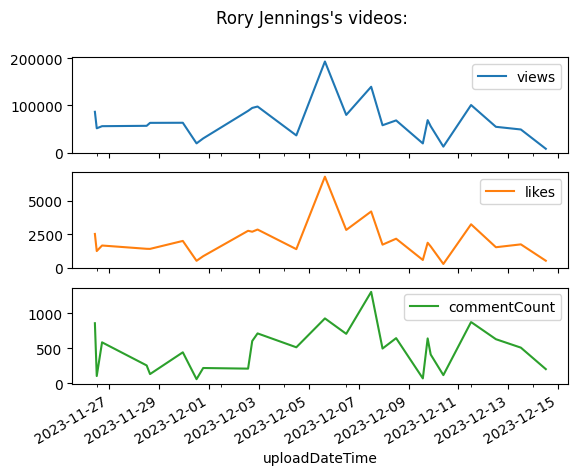

In [8]:
plot = vars.plot(kind=chartSelect.value, title=f"{chanChoice['name']}'s videos:", subplots=True)